## Problem Statement:

- X Education is an organization which provides online courses for industry professional. The company marks its courses on  several popular websites like google.
- X Education wants to select most promising leads that can be converted to paying customers.
- Although the company generates a lot of leads only a few are converted into paying customers, wherein the company wants a   higher lead conversion. Leads come through numerous modes like email, advertisements on websites, google searches etc.
- The company has had 30% conversion rate through the whole process of turning leads into customers by approaching those leads which are to be found having interest in taking the course. The implementation process of lead generating attributes are not efficient in helping conversions.


## Goals Of The Case Study

- The company requires a model to be built for selecting most promising leads.
- Lead score to be given to each leads such that it indicates how promising the lead could be. The higher the lead score the more promising the lead to get converted, the lower it is the lesser the chances of conversion.
- The model to be built in lead conversion rate around 80% or more.


### Importing Libraries

In [185]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

### Data Understanding and Exploration

In [187]:
# Read the csv and create dataframe
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows',80)
leads=pd.read_csv('leads.csv')

In [188]:
# print head of dataframe
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [189]:
# check rows and columns of dataframe
leads.shape

(9240, 37)

In [190]:
# print the information of variables 
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [191]:
#check for duplicates
leads.duplicated().sum()

0

In [192]:
# Display statistical summary 
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data quality check and cleaning

In [193]:
# checking Prospect ID and Lead Number
id=['Prospect ID','Lead Number']
for i in id:
    print(i,': ',leads[i].nunique())

Prospect ID :  9240
Lead Number :  9240


In [194]:
#dropping Lead Number and Prospect ID since they are ID's and unique with same size of dataset
leads.drop(['Prospect ID', 'Lead Number'],axis=1,inplace = True)

In [195]:
# As per data dictionary 'Select' value means customer not filled that column.So it is missing or null value
# so replace Select with NaN value
leads=leads.replace('Select',np.nan)

In [196]:
# Check datatype of columns
leads.dtypes

Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article                                 object
X Education Forums             

### Handling Missing Values

In [197]:
leads.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

We can see that many columns have high percenatge of null values.so these columns are of no use and its better to drop them

#### Drop columns with null value percentage > 35

In [198]:
# drop columns with missing percentage >35
null_perc=leads.isnull().mean()*100
above_35=null_perc[null_perc>35].index.to_list()
above_35

['Specialization',
 'How did you hear about X Education',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [199]:
leads=leads.drop(above_35,axis=1)

In [200]:
# check shape again
leads.shape

(9240, 25)

In [201]:
# check missing values again
leads.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

#### Handling other missing values

In [202]:
# Handling 'What matters most to you in choosing a course'
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

we can clearly see that 'Better Career Prospects' has most value counts.so we can impute null values with this value

In [203]:
leads['What matters most to you in choosing a course']=leads['What matters most to you in choosing a course'].fillna('Better Career Prospects')

In [204]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [205]:
#Handling 'What is your current occupation'
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [206]:
# we can replace NaN values 'Not provided'
leads['What is your current occupation'].replace(np.nan,'Not provided',inplace=True)

In [207]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Not provided            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [208]:
# Handling 'Country'
leads.Country.value_counts(normalize=True,dropna=False)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

we can see 70% of values lies for a single country-India.we can impute the NaN values with 'Not specified'

In [209]:
# Impute null value with 'Not specified'
leads.Country.fillna('Not specified',inplace=True)

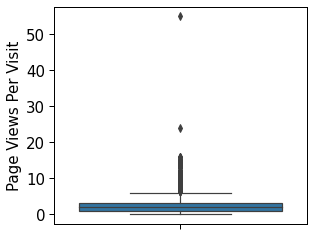

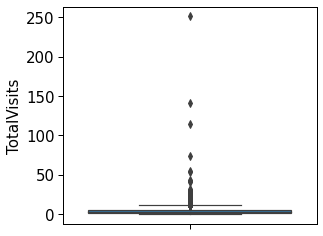

In [210]:
# Handling 'Page Views Per Visit' & 'TotalVisits'
list1=['Page Views Per Visit','TotalVisits']
for i in enumerate(list1):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,i[0]+1)
    sns.boxplot(data=leads,y=i[1])
plt.show()

From boxplot we identify that both columns has outliers.So we can impute missing values with median and it wont impact analysis
as missing precentage is low

In [211]:
#impute with median
for i in list1:
    imp_val=leads[i].median()
    leads[i]=leads[i].fillna(imp_val)

In [212]:
# Handling 'Last Activity'
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [213]:
# Handling 'Lead Source'
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

As missing percentage is less we can impute null values in both columns with mode

In [214]:
cols=['Last Activity','Lead Source']
for i in cols:
    imp_val=leads[i].mode()[0]
    leads[i].fillna(imp_val,inplace=True)

In [215]:
# Replace Google and google with 'Google'
leads['Lead Source'].replace(['Google','google'],'Google',inplace=True)


In [216]:
# Grouped low frequent values to 'Others'
leads['Lead Source'].replace(['bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone',
                             'Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'],'Others',inplace=True)

In [217]:
# Grouped low frequent values to 'Others'
leads['Last Activity'].replace(['Approached upfront','View in browser link Clicked ','Email Received','Email Marked Spam ','Visited Booth in Tradeshow',
                            'Resubscribed to emails'],'Others',inplace=True)

In [218]:
# Check Null values again
leads.isnull().mean()*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

**Now we are done with handling Missing values**

### Outlier Analysis

In [219]:
# outlier Analysis is done for continuous numerical columns
num_cols=leads.select_dtypes(include=['float','int']).columns
# As 'Converted' column has discrete values.so we need to drop it 
num_cols=num_cols.drop('Converted')

In [220]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leads[num_cols].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


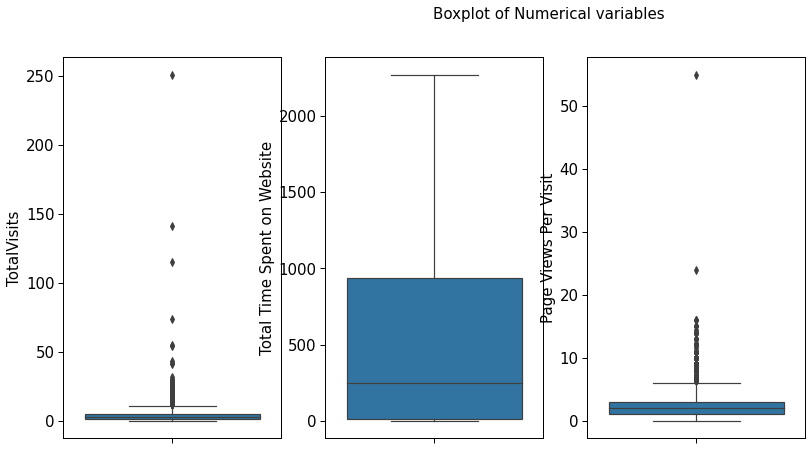

In [221]:
# plot the numerical variable for outlier Analysis
plt.figure(figsize=(18,7))
pos=1
for i in num_cols:
    plt.subplot(1,4,pos)
    sns.boxplot(data=leads,y=i)
    plt.suptitle('Boxplot of Numerical variables',size=15)
    pos=pos+1

- TotalVisits and Page Views Per Visit has outliers 
- Total Time Spent on Website has min value at 0 and most of values lies below 1000
- TotalVisits has most values lies between 1 and 5 
- Page Views Per Visit has most values lies below 5 and above upper whisker at around 8 are outliers

##  Data Visualization 

### Analysis of Target Variable

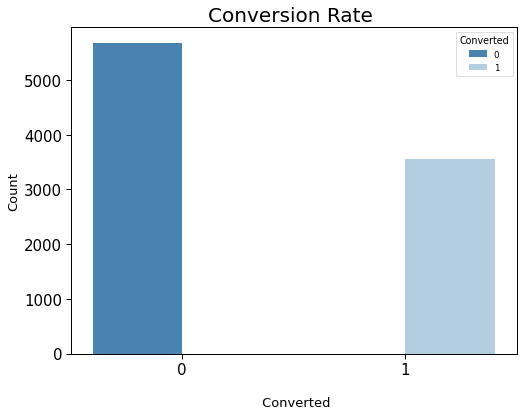

In [222]:
# plot Target Variable-'Converted'
plt.figure(figsize=[8,6])

sns.countplot(data=leads, x=leads['Converted'],palette="Blues_r",hue = 'Converted')
plt.title('Conversion Rate ',fontsize=20)
plt.xlabel('\n Converted',fontsize=13)
plt.ylabel('Count',fontsize=13)

plt.xticks(rotation=0)

plt.show()

In [223]:
# Calculating Current Conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.53896103896104

**we can see that current conversion rate is only 38.53% and we need to build a model which help X Education to improve
its conversion rate**

### Univariate Analysis

### Categorical columns

In [224]:
# define function for univariate Analysis
def univar_cat(column):
    plt.figure(figsize=(12,6))
    sns.countplot(data=leads,x=column)
    plt.title("Univariate Analysis of"+ ' '+column)
    plt.xticks(rotation=90)

In [225]:
cat_cols=leads.select_dtypes(include=object).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

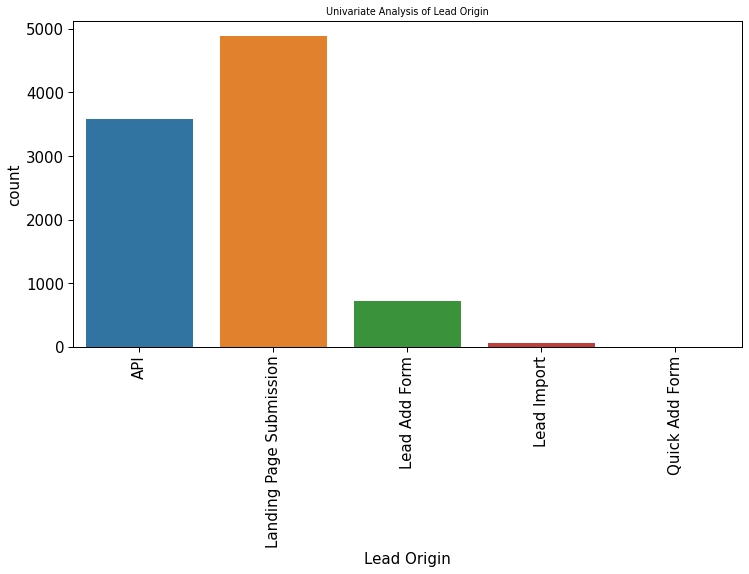

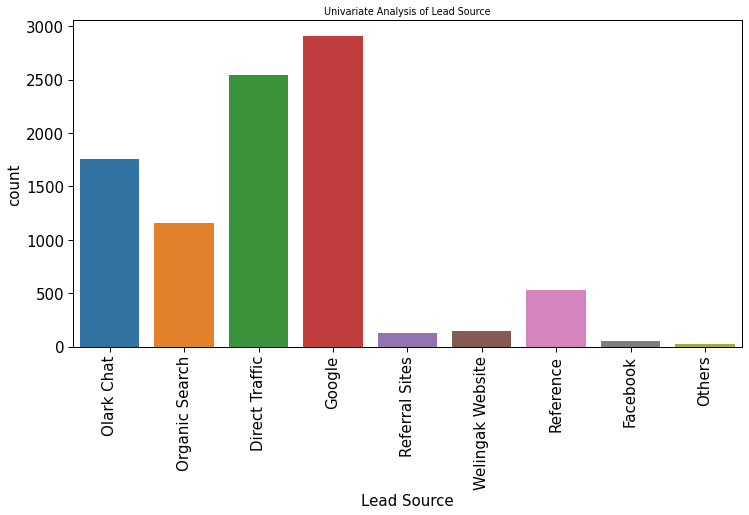

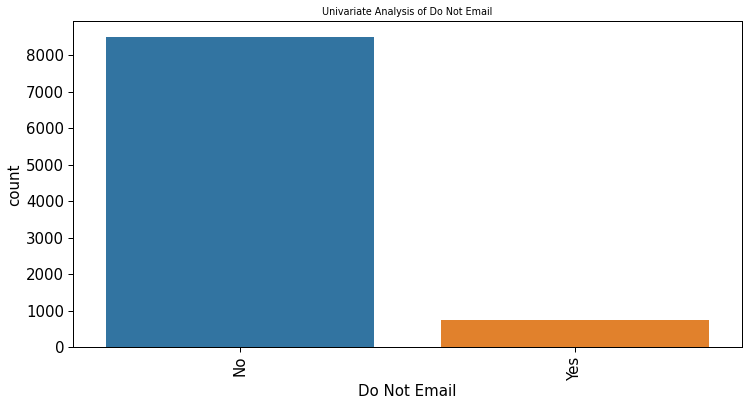

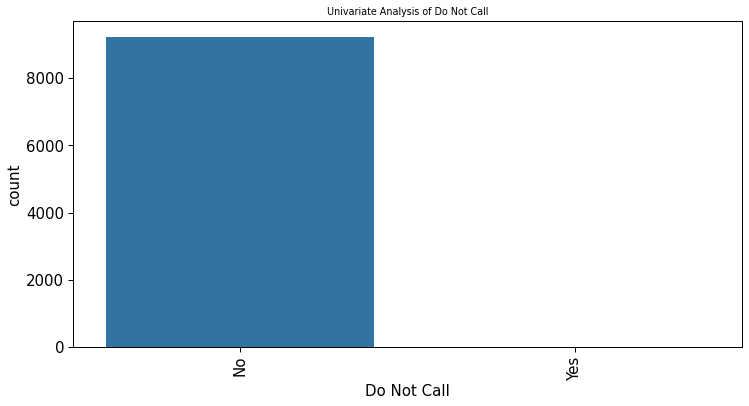

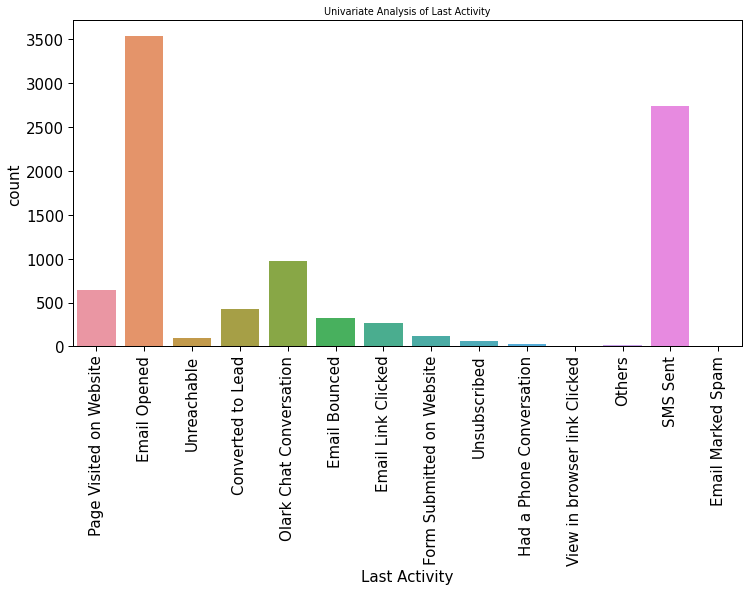

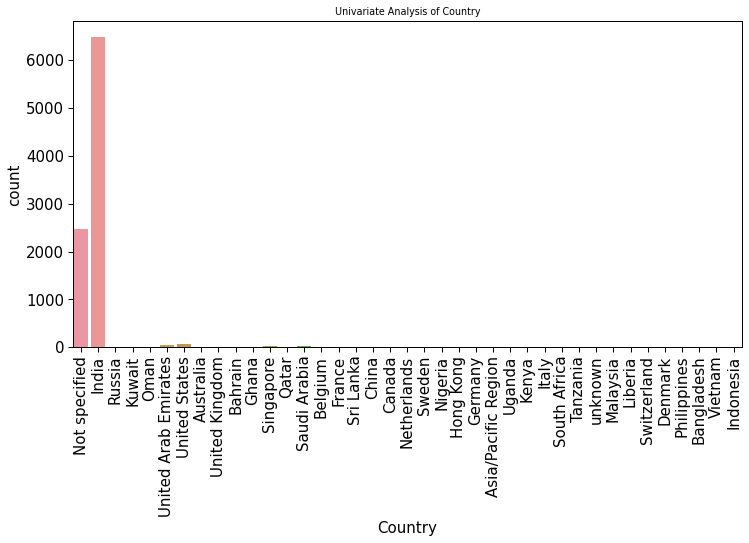

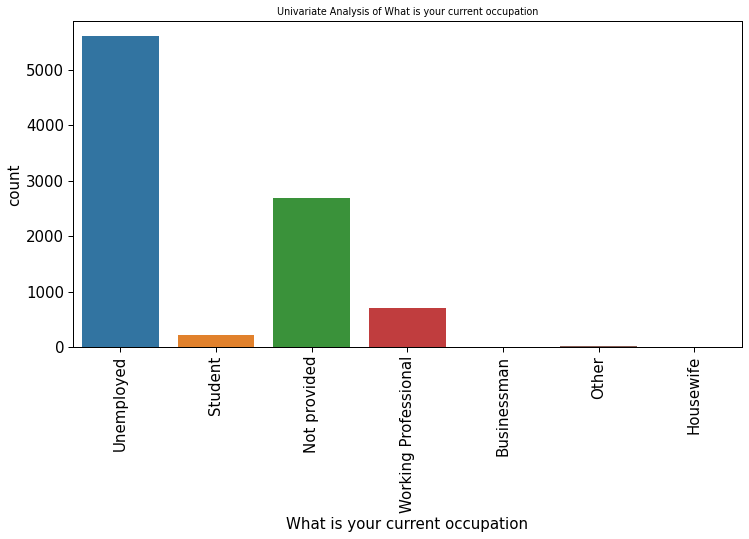

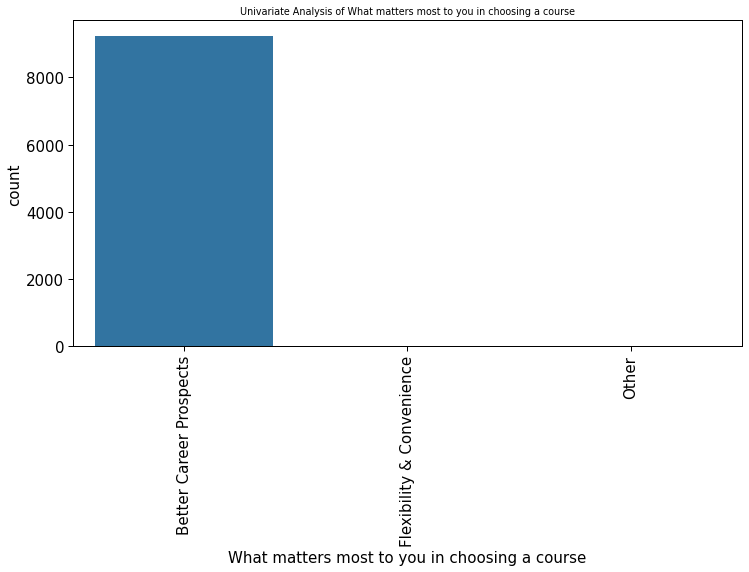

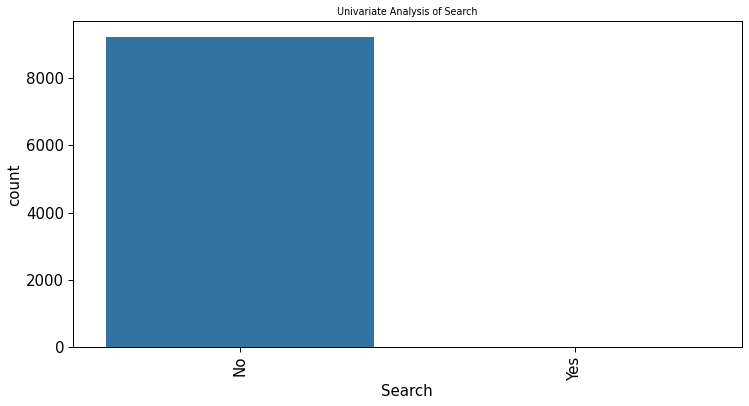

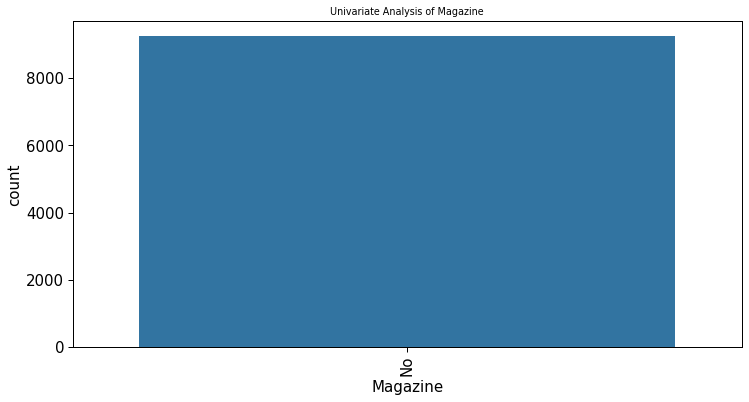

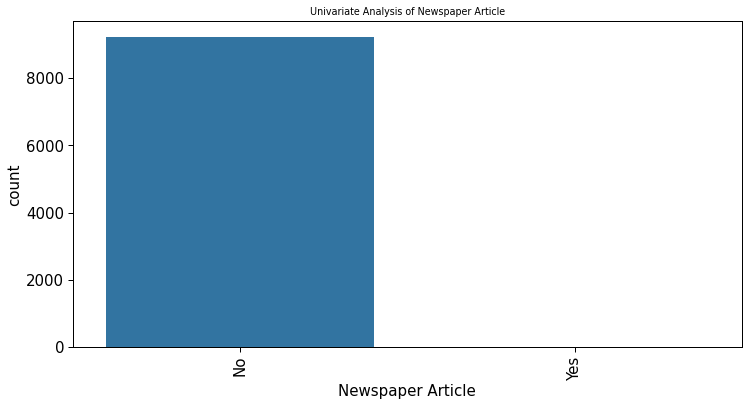

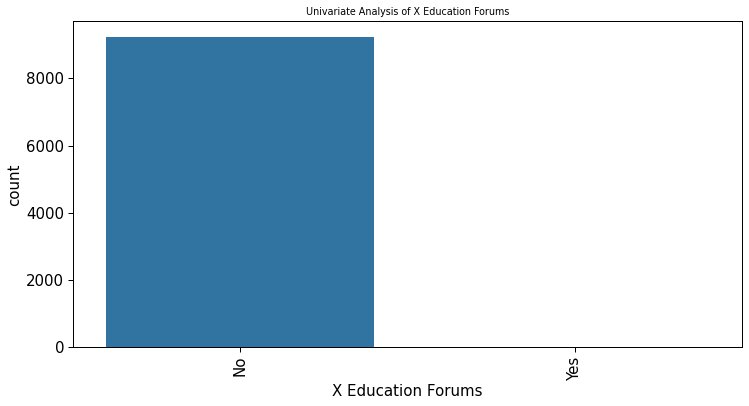

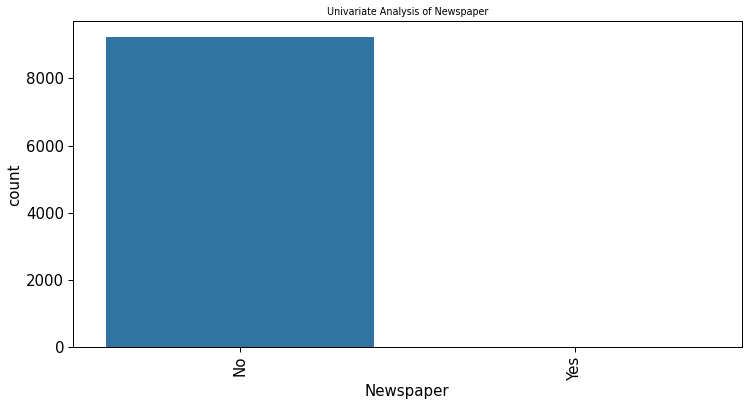

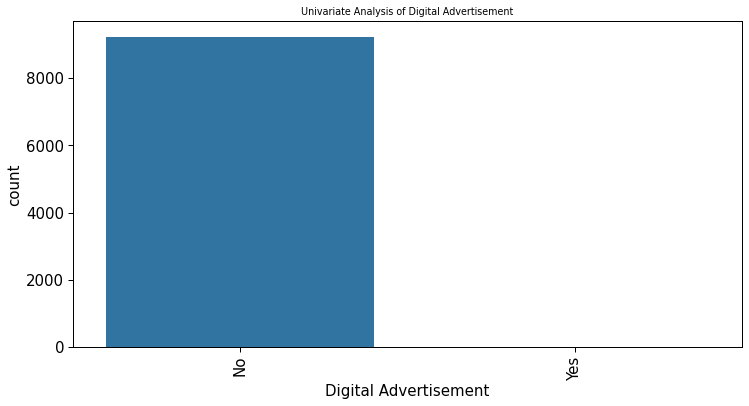

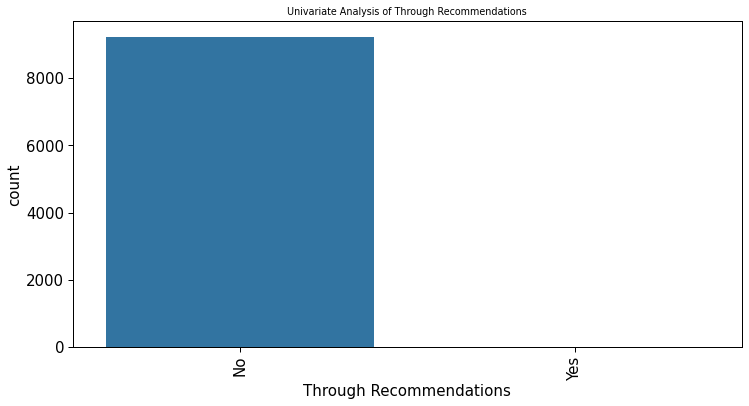

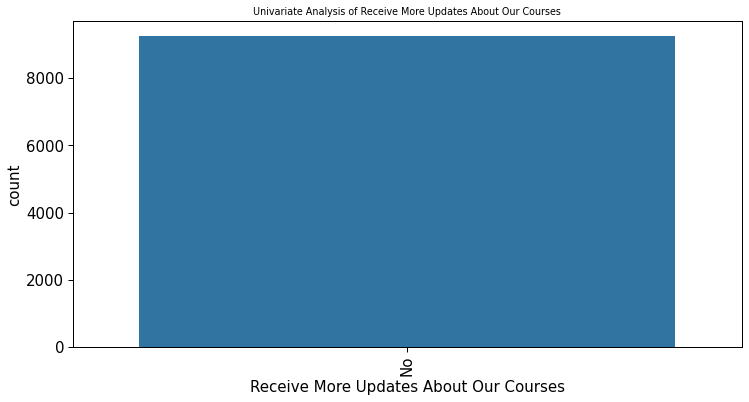

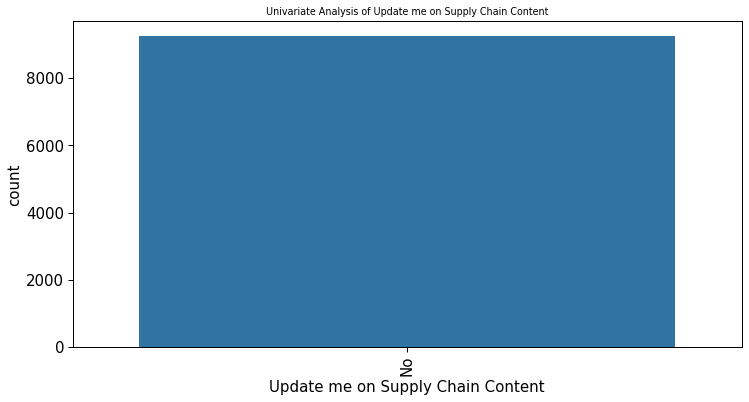

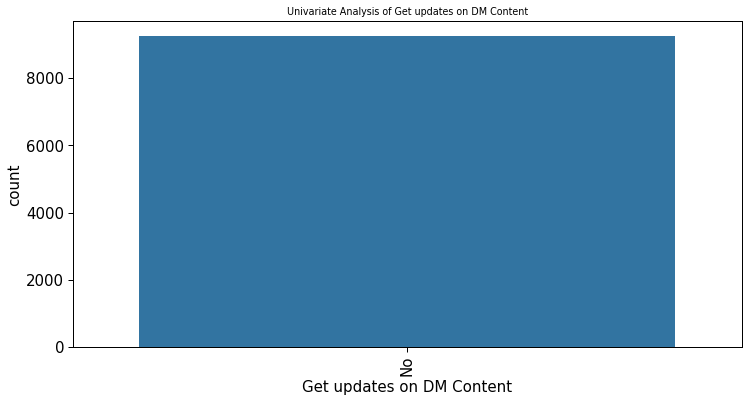

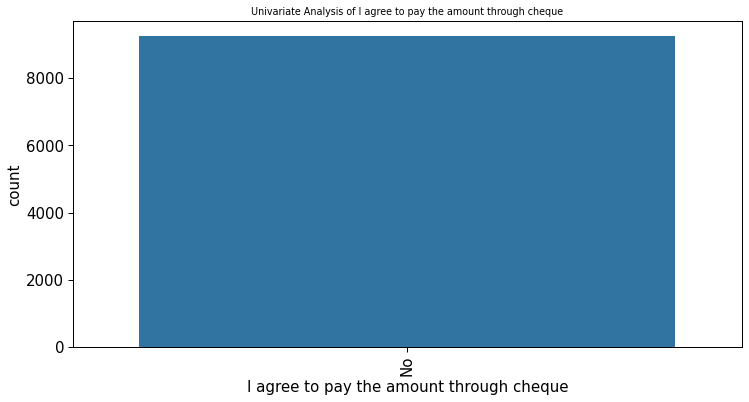

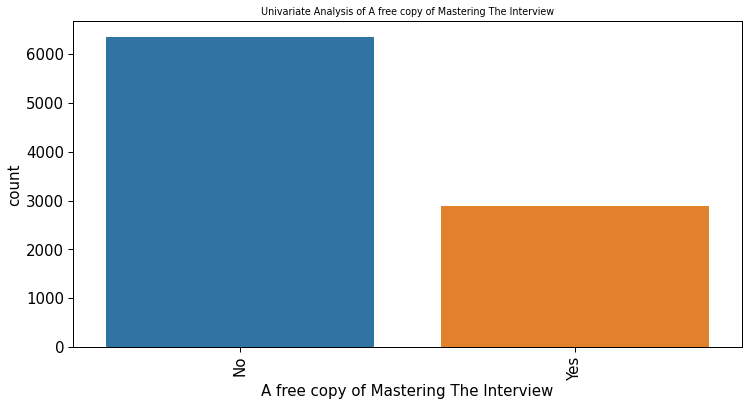

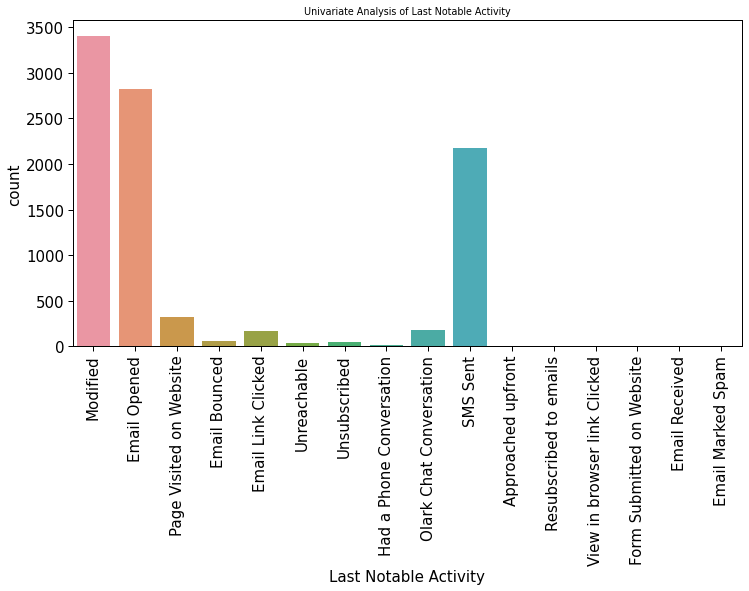

In [226]:
for i in cat_cols:
    univar_cat(i)
    plt.show()

**Observations:**

- Most of leads are generated from 'Landing Page Submission' followed by API
- Google and direct traffic produce the most prospects.
- Around 92% people respond No to 'Do not Email' and almost all responsed No to 'Do not Call'
- Most leads are generated when the last action was an email opened followed by SMS sent & Last Notable Activity was Modified followed by Email opened 
- Most of the leads generated are unemployed which is obvious as they need to pursue some course for getting Job followed by working professional for better promotions and all
- Most of leads generated are choosing course for better career prospects
- Around 99% responded 'No' to Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement and Recommendations & Almost 100% responded 'NO' to Magazine interms of whether the customer had seen the ad in any of the listed items which makes these observations biased
- Almost all customers responded 'NO' to Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content % I agree to pay the amount through cheques
- Around 70% not required a free copy of Mastering The Interview



### Numerical columns

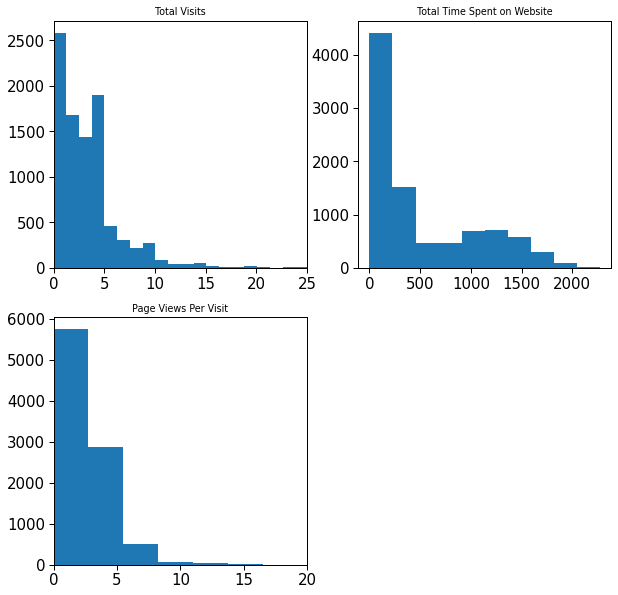

In [227]:
# Plotting Numerical columns
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(leads['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(leads['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(leads['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Bivariate & Multivariate  Analysis
#### Categorical Variables Vs Converted

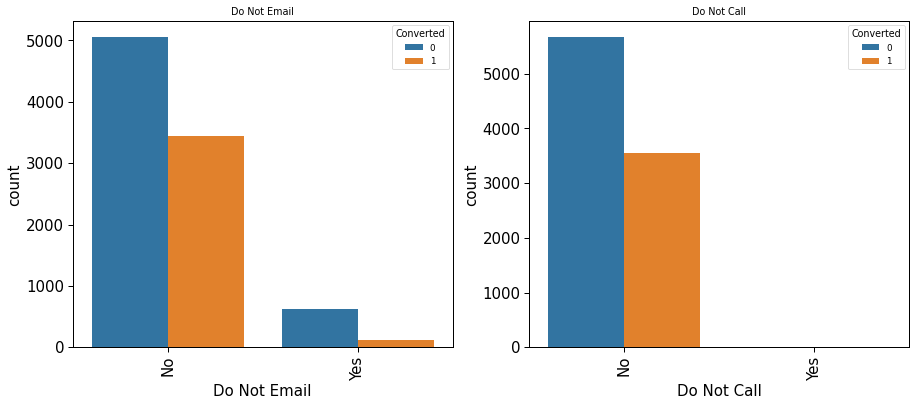

In [228]:
# Analysis of Do Not Email,Do Not Call with 'Converted'
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

- Do not Call is imbalanced as almost all customers are in category 'No'.So this column cannot be used for further Analysis
- Do not Email has more conversion rate for customers who responded 'No'

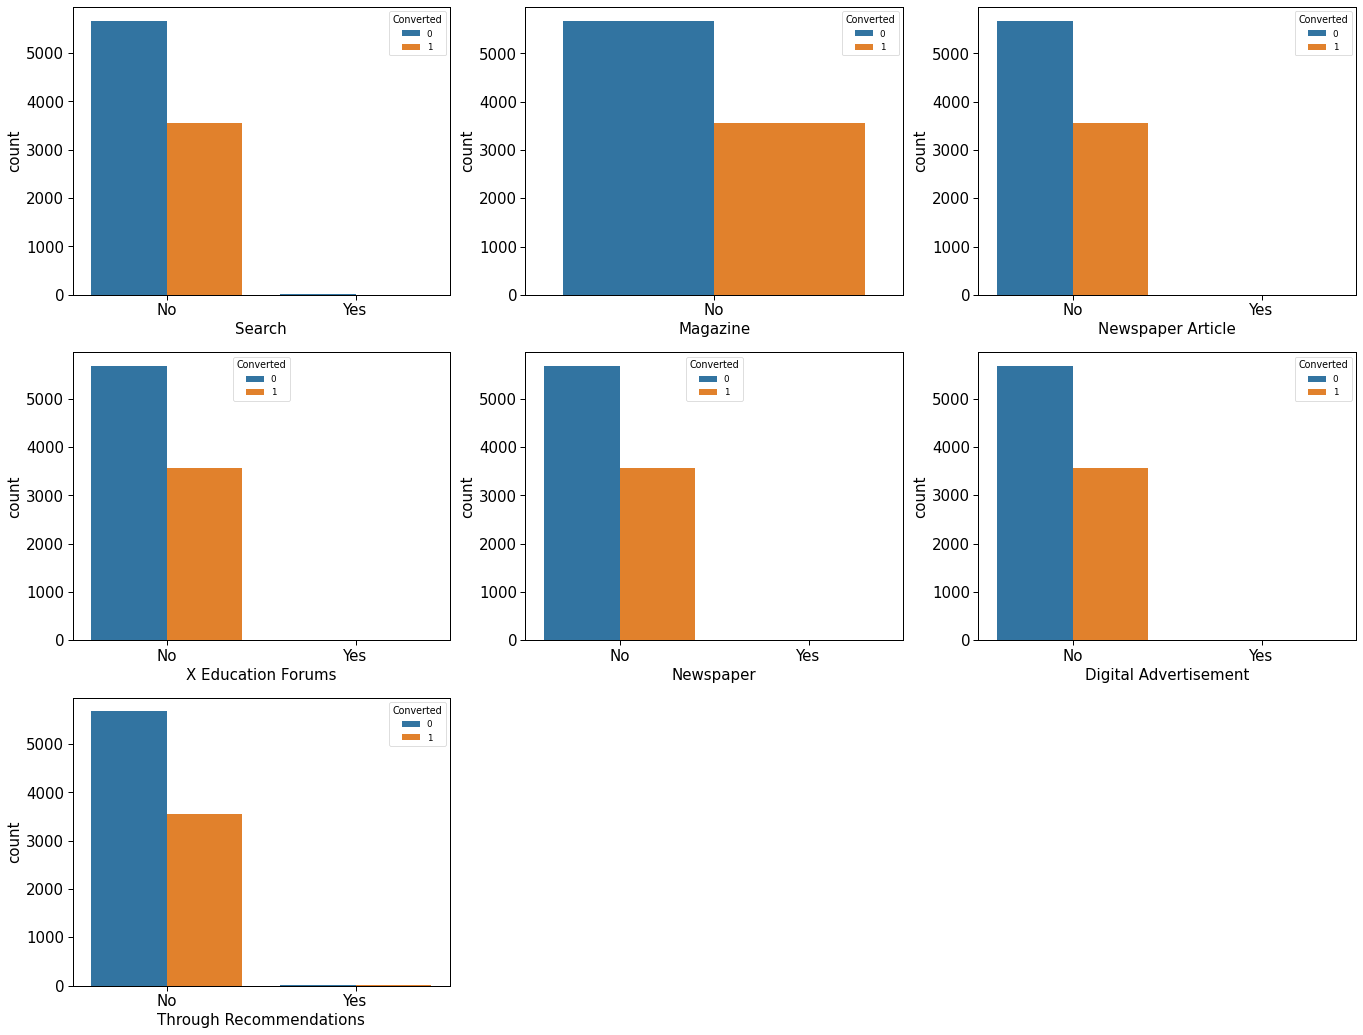

In [229]:
# Analysis of columns Indicating whether the customer had seen the ad in any of the listed items.
plt.figure(figsize=(23,18))
plt.rcParams["axes.labelsize"]=15
plt.subplot(3,3,1)
sns.countplot(x = "Search", hue = "Converted", data = leads)
plt.subplot(3,3,2)
sns.countplot(x = "Magazine", hue = "Converted", data = leads)
plt.subplot(3,3,3)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads)
plt.subplot(3,3,4)
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads)
plt.subplot(3,3,5)
sns.countplot(x = "Newspaper", hue = "Converted", data = leads)
plt.subplot(3,3,6)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads)
plt.subplot(3,3,7)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads)
plt.show()

We can see that all these columns have highly impbalanced data.So its better to drop them than to use in analysis as it will create bias

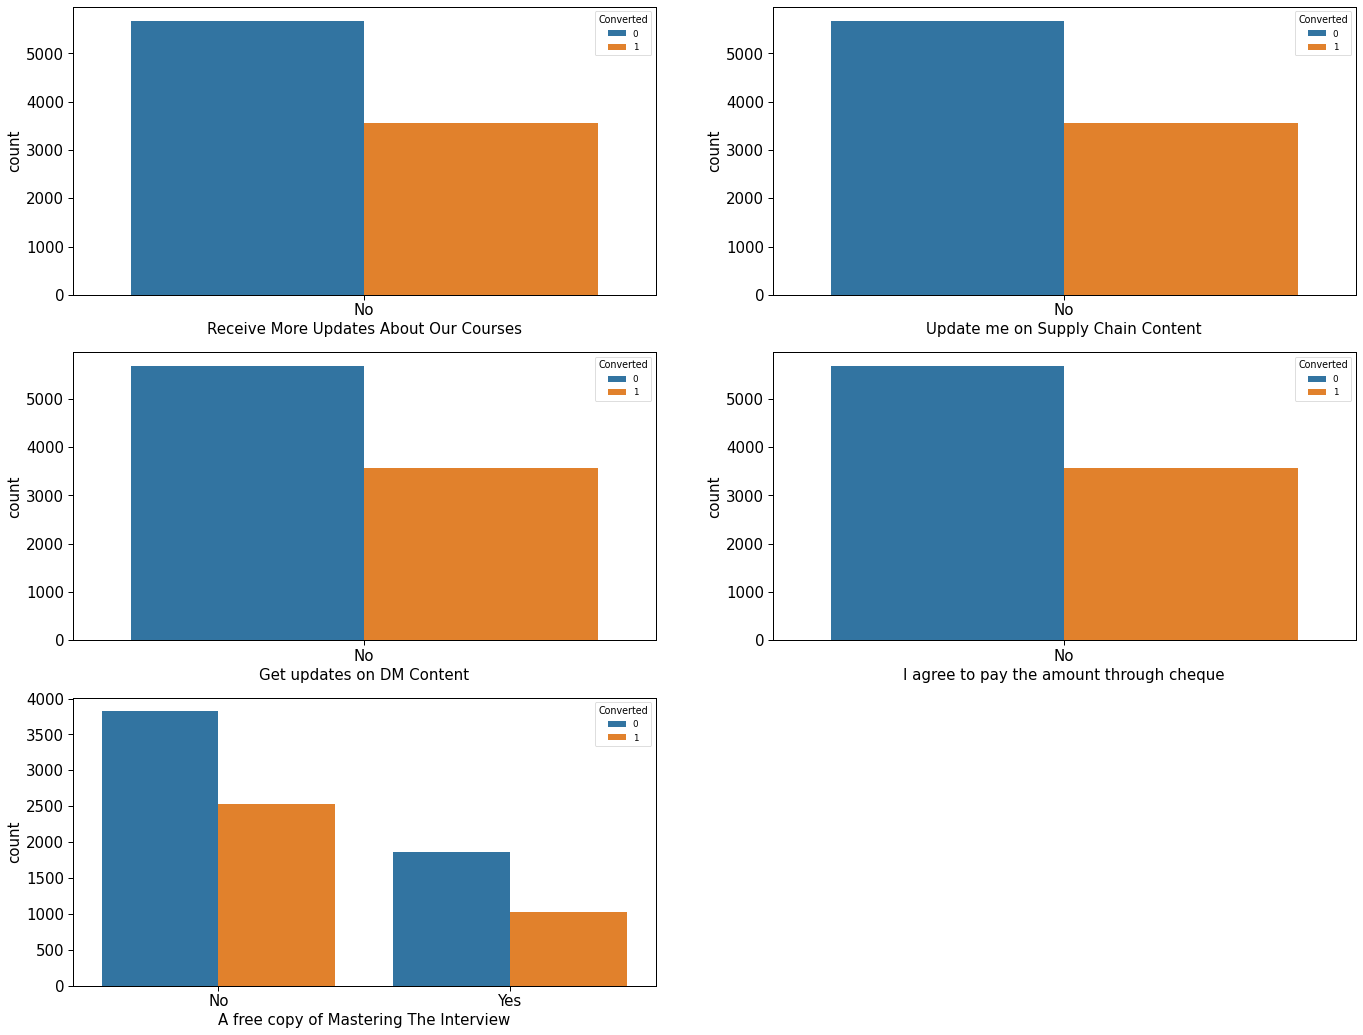

In [230]:
# Analysis of other binary value columns
plt.figure(figsize=(23,18))
plt.rcParams["axes.labelsize"]=15
plt.subplot(3,2,1)
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads)
plt.subplot(3,2,2)
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = leads)
plt.subplot(3,2,3)
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads)
plt.subplot(3,2,4)
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads)
plt.subplot(3,2,5)
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads)
plt.show()

- Apart from 'A free copy of Mastering The Interview' all other columns data are highly imbalanced so we can drop them
- A free copy of Mastering The Interview is redundant variable which is of no use in Analysis.So better to drop this also

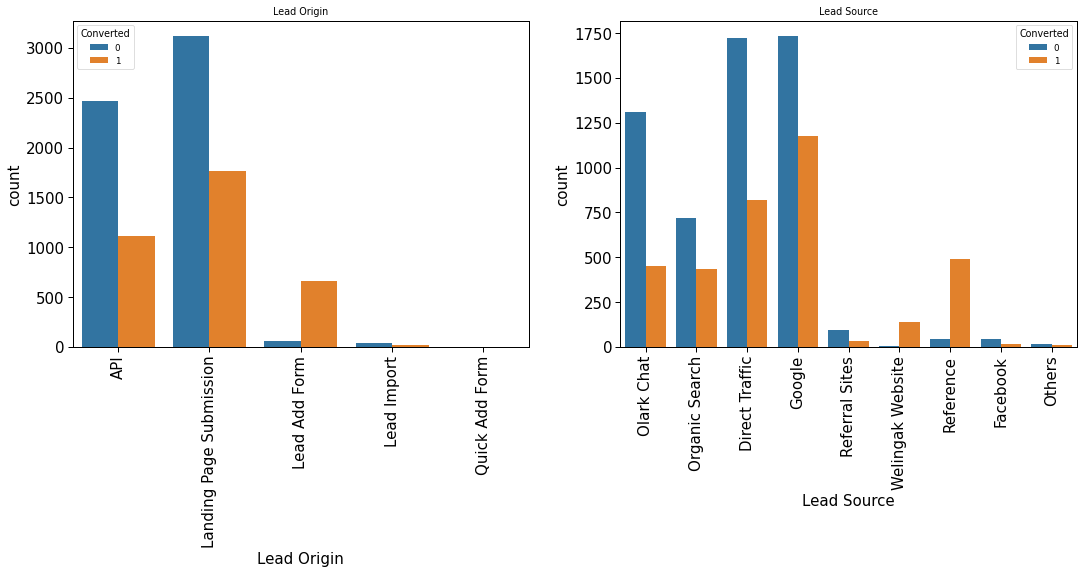

In [231]:
# Analysis of 'Lead Origin' & 'Lead Source'
plt.figure(figsize = (18,6))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads)
plt.xticks(rotation=90)              
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= leads)
plt.xticks(rotation=90) 
plt.title('Lead Source')
plt.show()

- Conversion is mostly from Landing Page Submission and API.Lead Ad form has more converted leads than nonconverted
- Google and Direct Traffic generated more leads and high in conversion also
- Reference and welingak Website has high conversions

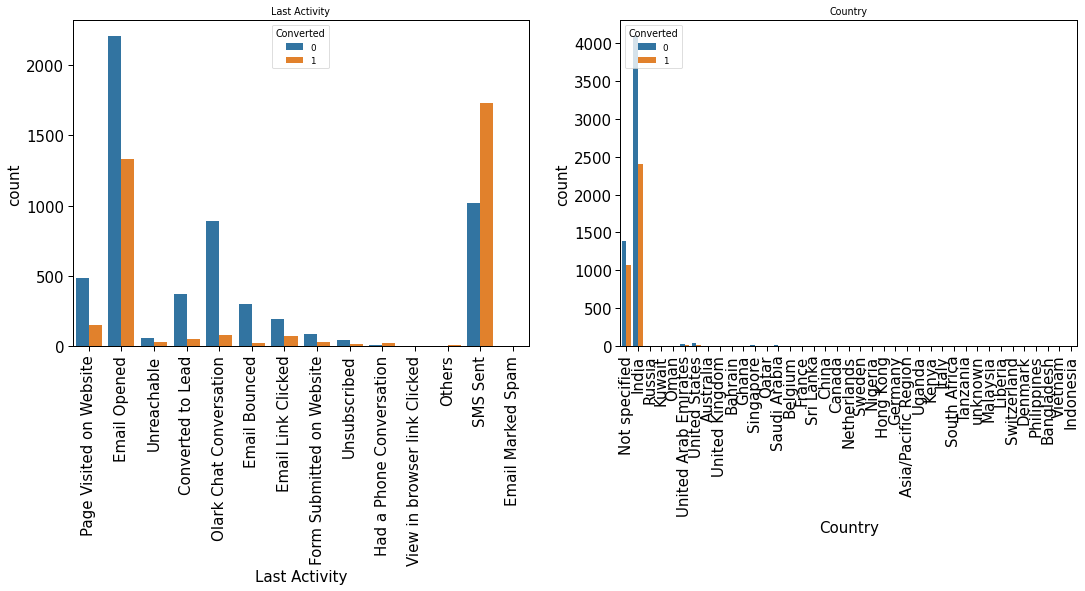

In [232]:
plt.figure(figsize = (18,6))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

- SMS Sent has high conversion rate which is followed by Email Opened
- Most of leads are from India and hence conversion is also high.No inferences can be drawn from this column.so can be dropped

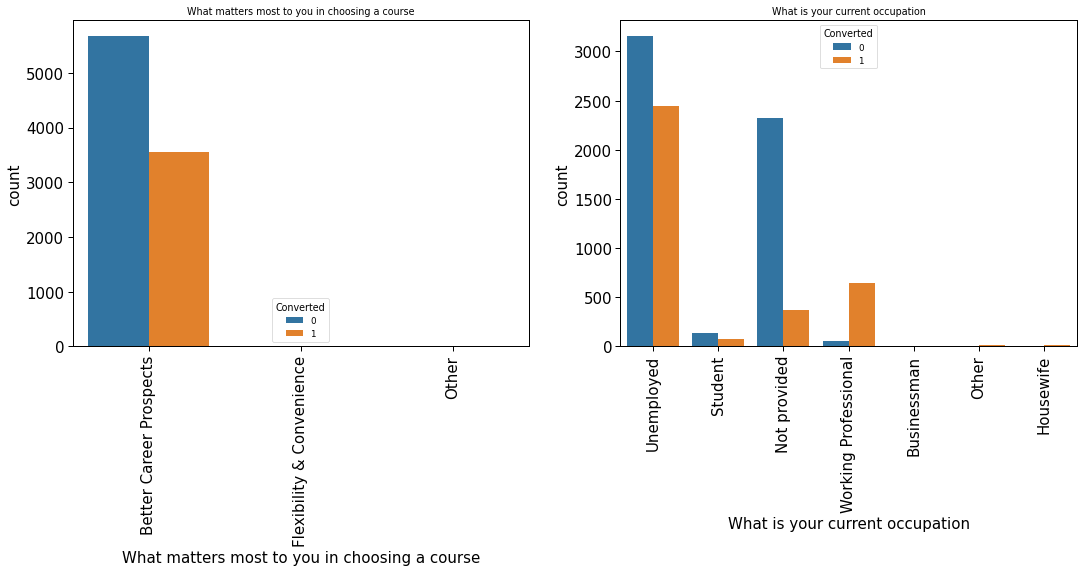

In [233]:
plt.figure(figsize = (18,6))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

- Unemployed generated high leads and has high conversion rate also
- Working Professional has high conversion rate
- Most of the customers choose Better career Prospects and data is almost imbalanced.so we can drop it


In [234]:
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [235]:
# Before plotting Last Notable Activity,just group less frequent ones to 'Others'
leads['Last Notable Activity'].replace(['Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked',
                                       'Form Submitted on Website','Email Received'],'Others',inplace=True)

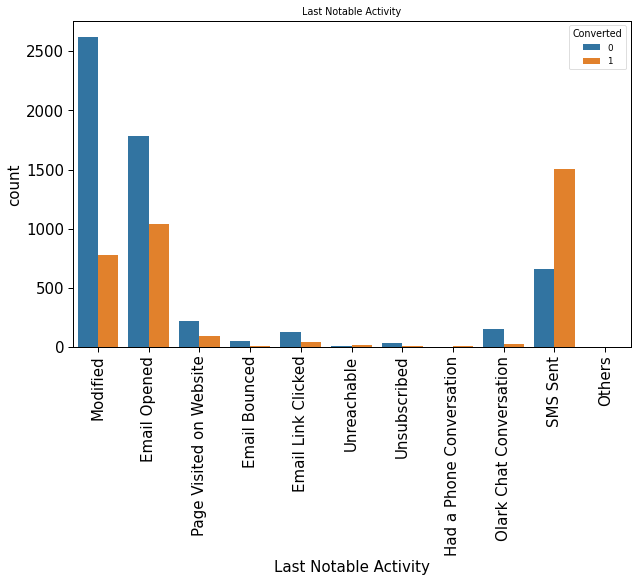

In [236]:
plt.figure(figsize=(10,6))
sns.countplot(x='Last Notable Activity', hue='Converted', data=leads).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()


- SMS sent followed by Email opened and Modified has high conversion rate than others.

In [237]:
# Dropping highly imbalanced and redundant columns
cols_to_drop=['Do Not Call','Country','What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content',
              'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Activity','Last Notable Activity']
leads=leads.drop(cols_to_drop,axis=1)

In [238]:
leads.shape

(9240, 8)

### Numerical variable Vs Converted

As we know Total Visits and Page Views per visit has outliers,we cap them to 95% percentile

In [239]:
#removing (statistical) outliers for TotalVisits
Q1 = leads['TotalVisits'].quantile(0.05)
Q3 = leads['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.5*IQR)]

#removing (statistical) outliers for TotalVisits
Q1 = leads['Page Views Per Visit'].quantile(0.05)
Q3 = leads['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]


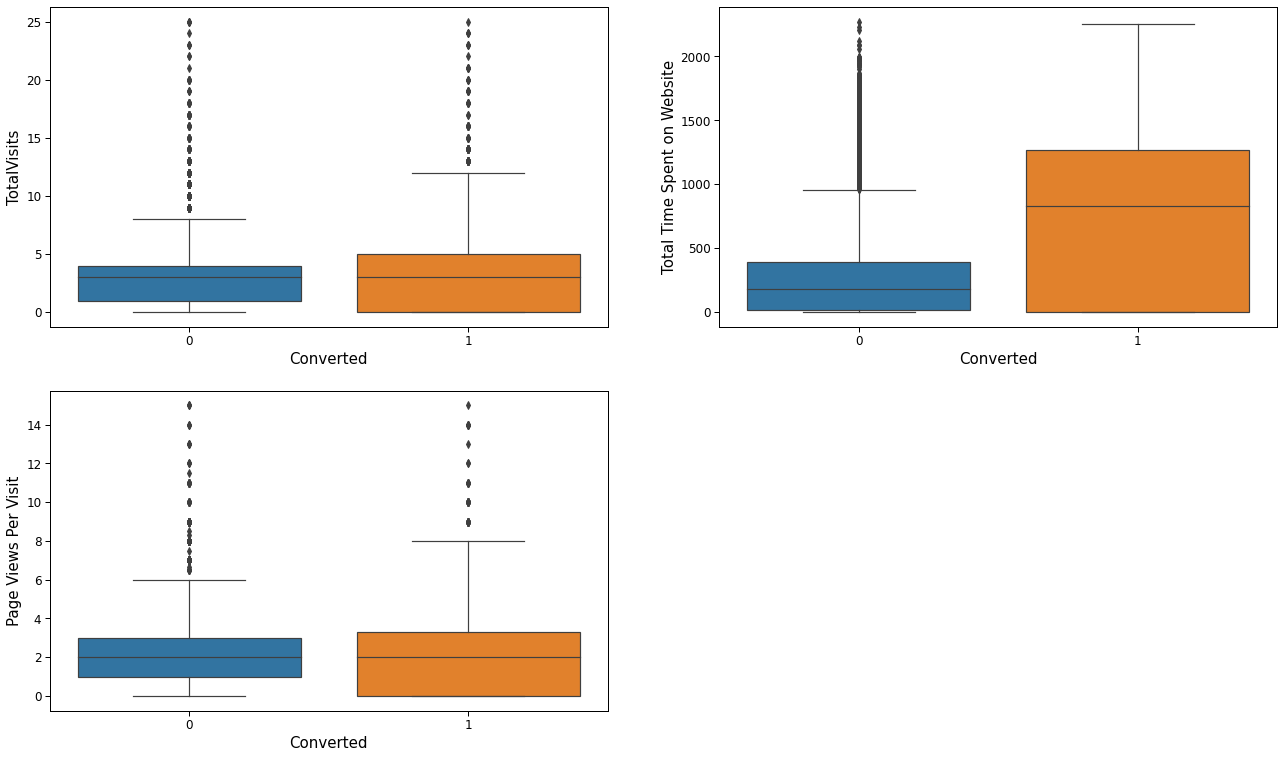

In [240]:
# Bivariate Analysis
plt.figure(figsize=(22, 20))
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.subplot(3,2,1)
sns.boxplot(x = 'Converted', y = 'TotalVisits', data = leads)
plt.subplot(3,2,2)
sns.boxplot(x = 'Converted', y = 'Total Time Spent on Website', data = leads)
plt.subplot(3,2,3)
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data = leads)
plt.show()

- For TotalVisits,median of both converted and not converted are same
- we can see an increase in conversion rate for those who spent more time on website.so to boost conversion company should make
website more reliable and engagable
- median for page views per visit for both category are same

<Figure size 1152x576 with 0 Axes>

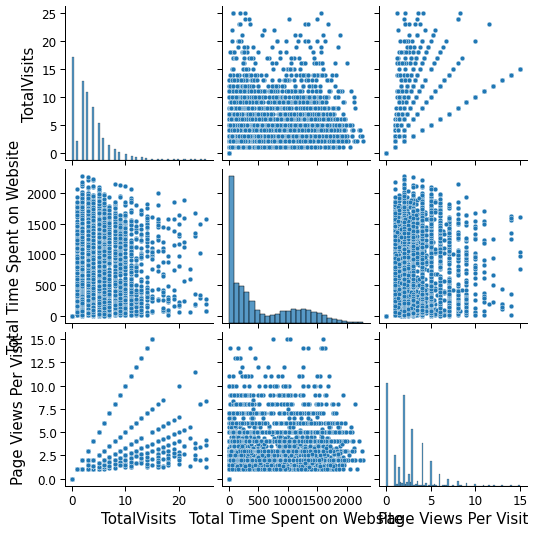

In [241]:
# pairplot of Numerical variables
plt.figure(figsize = (16,8))
sns.pairplot(data=leads,vars=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'])
sns.set_context ("paper", rc= {"axes.labelsize":15})
plt.show()

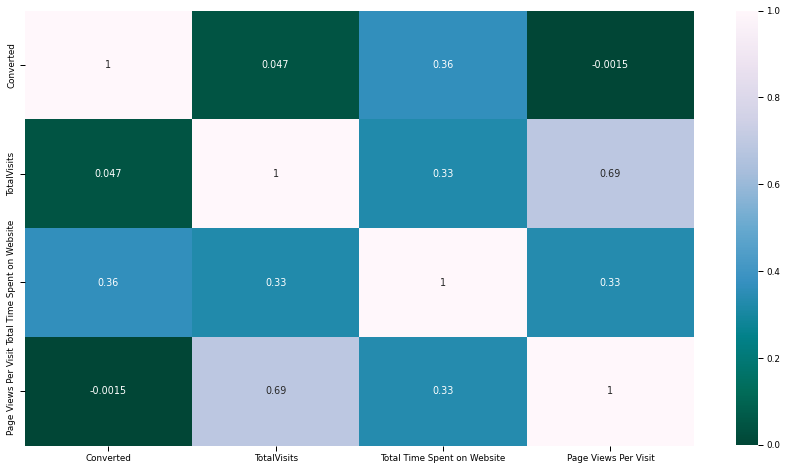

In [242]:
#Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize=(15,8))

# heatmap
sns.heatmap(leads.corr(), cmap="PuBuGn_r", annot=True)
plt.xticks(rotation=0)
plt.show()

## Data Preparation

####  Converting binary variables to 0/1

In [243]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] =leads[varlist].apply(binary_map)

In [244]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


#### Dummy Variable

In [245]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin','Lead Source']], drop_first=True)

# Adding the results to the master dataframe
leads= pd.concat([leads, dummy1], axis=1)

In [246]:
# Creating dummy variable separately by specifying which one to drop explicitly
# Remove Not provided as it is Null value
curr_occ = pd.get_dummies(leads['What is your current occupation'], prefix='What is your current occupation')
curr_occ = curr_occ.drop(['What is your current occupation_Not provided'], 1)
leads = pd.concat([leads,curr_occ], axis=1)




In [247]:
# original categorical columns 
cols=leads.select_dtypes(include='object').columns.to_list()
cols

['Lead Origin', 'Lead Source', 'What is your current occupation']

In [248]:
# Drop categorical columns
leads=leads.drop(cols,axis=1)

In [249]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


###  Test-Train Split

As you know, the first basic step for regression is performing a train-test split.

In [250]:
#import train_test_split from sklearn 
from sklearn.model_selection import train_test_split

In [251]:
# Putting feature variable to X
X = leads.drop('Converted', axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [252]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [253]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [254]:
#import standardscaler
from sklearn.preprocessing import StandardScaler

In [255]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
2178,0,0.520598,-0.715514,1.307156,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2924,0,-0.094975,0.057816,-0.164590,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
9108,0,0.212811,2.673012,0.816574,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7926,0,0.212811,-0.463774,-0.493279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7870,0,0.828384,-0.461963,1.797738,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


### Correlation Analysis

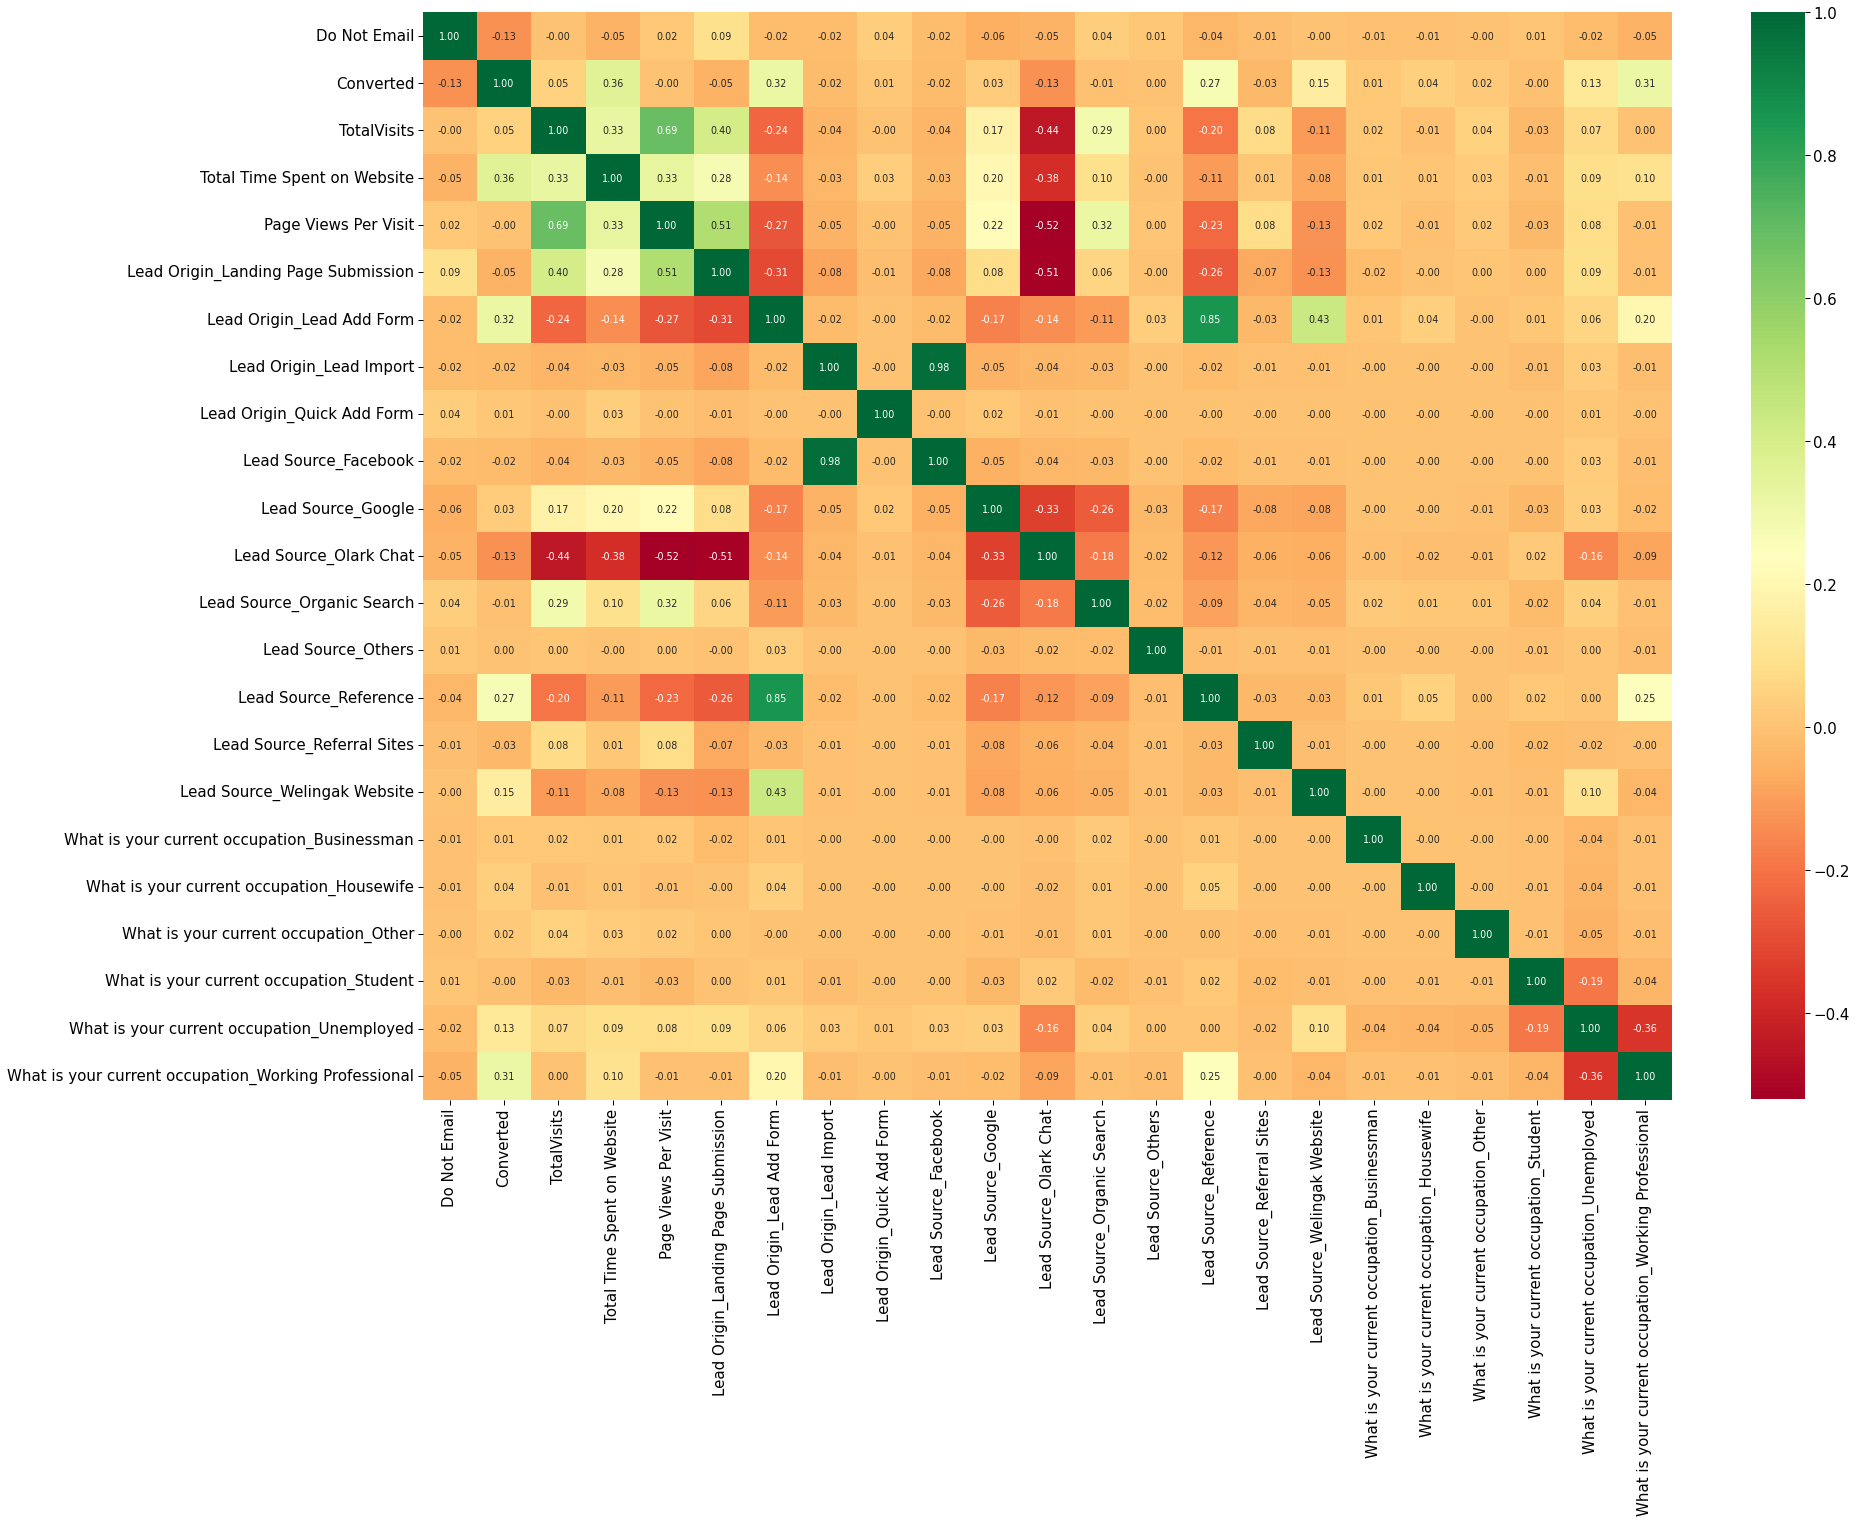

In [256]:
# Let's see the correlation matrix 
plt.figure(figsize = (28,20))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
sns.heatmap(leads.corr(), annot = True, cmap="RdYlGn",fmt='.2f')
plt.show()

# Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

### Feature Selection Using RFE

In [257]:
# import logisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [258]:
# import RFE and select top 15 features
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [259]:
# print choosen features and ranking
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False False  True False False  True  True  True False
 False  True  True  True  True  True  True  True  True  True]
[1 2 1 4 5 1 6 8 1 1 1 3 7 1 1 1 1 1 1 1 1 1]


In [260]:
# for better view create a df for rfe choosen features with ranking
Choosen_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Choosen/not':rfe.support_,
                                     'Ranking':rfe.ranking_})
Choosen_rfe_features.sort_values(by='Ranking')[:15]

,Feature,Choosen/not,Ranking
0,Do Not Email,True,1
19,What is your current occupation_Student,True,1
18,What is your current occupation_Other,True,1
17,What is your current occupation_Housewife,True,1
16,What is your current occupation_Businessman,True,1
15,Lead Source_Welingak Website,True,1
14,Lead Source_Referral Sites,True,1
13,Lead Source_Reference,True,1
20,What is your current occupation_Unemployed,True,1
10,Lead Source_Olark Chat,True,1


In [261]:
#print selected features
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [262]:
# Not choosen columns
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Organic Search',
       'Lead Source_Others'],
      dtype='object')

### MODEL 1

In [263]:
import statsmodels.api as sm

In [264]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6433
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2905.1
Date:                Sat, 20 May 2023   Deviance:                       5810.3
Time:                        19:16:17   Pearson chi2:                 7.24e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3551
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1102      0.089    -23.797      0.000      -2.284      -1.936
Do Not Email                                            -1.1342      0.153     -7.404      0.000      -1.434      -0.834
Total Time Spent on Website                              1.1060      0.038     28.757      0.000       1.031       1.181
Lead Origin_Lead Add Form                                3.1231      0.491      6.362      0.000       2.161       4.085
Lead Source_Facebook                                    -0.3787      0.534     -0.710      0.478      -1.425       0.667
Lead Source_Google                                       0.1966      0.076      2.580      0.010       0.047       0.346
Lead Source_Olark Chat                                   1.0056      0.101      9.971      0.000       0.808       1.203
Lead Source_Reference                                    0.3833      0.526      0.729      0.466      -0.647       1.414
Lead Source_Referral Sites                              -0.5842      0.329     -1.776      0.076      -1.229       0.061
Lead Source_Welingak Website                             3.2666      1.119      2.918      0.004       1.073       5.461
What is your current occupation_Businessman              2.7272      1.278      2.134      0.033       0.223       5.232
What is your current occupation_Housewife               23.6785   1.39e+04      0.002      0.999   -2.72e+04    2.72e+04
What is your current occupation_Other                    1.9836      0.786      2.523      0.012       0.443       3.524
What is your current occupation_Student                  1.1115      0.216      5.152      0.000       0.689       1.534
What is your current occupation_Unemployed               1.3474      0.084     16.101      0.000       1.183       1.511
What is your current occupation_Working Professional     3.7484      0.184     20.342      0.000       3.387       4.110
========================================================================================================================
"""

P value of What is your current occupation_Housewife is above 0.05.so its not significant and hence we can drop it

In [265]:
cols = cols.drop('What is your current occupation_Housewife', 1)
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### MODEL 2

In [266]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6434
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2915.4
Date:                Sat, 20 May 2023   Deviance:                       5830.8
Time:                        19:16:18   Pearson chi2:                 7.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3530
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0780      0.088    -23.672      0.000      -2.250      -1.906
Do Not Email                                            -1.1407      0.153     -7.447      0.000      -1.441      -0.840
Total Time Spent on Website                              1.1048      0.038     28.776      0.000       1.030       1.180
Lead Origin_Lead Add Form                                3.1256      0.491      6.365      0.000       2.163       4.088
Lead Source_Facebook                                    -0.3851      0.533     -0.722      0.470      -1.430       0.660
Lead Source_Google                                       0.1944      0.076      2.556      0.011       0.045       0.343
Lead Source_Olark Chat                                   0.9932      0.101      9.869      0.000       0.796       1.190
Lead Source_Reference                                    0.4240      0.526      0.806      0.420      -0.607       1.455
Lead Source_Referral Sites                              -0.5904      0.329     -1.797      0.072      -1.235       0.054
Lead Source_Welingak Website                             3.2632      1.119      2.915      0.004       1.069       5.457
What is your current occupation_Businessman              2.6927      1.278      2.106      0.035       0.187       5.198
What is your current occupation_Other                    1.9548      0.786      2.487      0.013       0.414       3.495
What is your current occupation_Student                  1.0812      0.216      5.014      0.000       0.659       1.504
What is your current occupation_Unemployed               1.3171      0.083     15.902      0.000       1.155       1.479
What is your current occupation_Working Professional     3.7170      0.184     20.214      0.000       3.357       4.077
========================================================================================================================
"""

As Lead Source_Reference has high p value,drop it

In [267]:
cols = cols.drop('Lead Source_Facebook', 1)
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### MODEL 3

In [268]:
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6435
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2915.7
Date:                Sat, 20 May 2023   Deviance:                       5831.4
Time:                        19:16:18   Pearson chi2:                 7.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3529
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0825      0.088    -23.771      0.000      -2.254      -1.911
Do Not Email                                            -1.1384      0.153     -7.432      0.000      -1.439      -0.838
Total Time Spent on Website                              1.1060      0.038     28.828      0.000       1.031       1.181
Lead Origin_Lead Add Form                                3.1264      0.491      6.368      0.000       2.164       4.089
Lead Source_Google                                       0.1982      0.076      2.611      0.009       0.049       0.347
Lead Source_Olark Chat                                   0.9986      0.100      9.945      0.000       0.802       1.195
Lead Source_Reference                                    0.4285      0.526      0.815      0.415      -0.602       1.459
Lead Source_Referral Sites                              -0.5867      0.329     -1.785      0.074      -1.231       0.058
Lead Source_Welingak Website                             3.2671      1.119      2.919      0.004       1.073       5.461
What is your current occupation_Businessman              2.6963      1.279      2.109      0.035       0.190       5.203
What is your current occupation_Other                    1.9573      0.786      2.490      0.013       0.416       3.498
What is your current occupation_Student                  1.0805      0.216      5.012      0.000       0.658       1.503
What is your current occupation_Unemployed               1.3173      0.083     15.902      0.000       1.155       1.480
What is your current occupation_Working Professional     3.7166      0.184     20.219      0.000       3.356       4.077
========================================================================================================================
"""

P value of Lead Source_Facebook is greater than 0.05,so we can drop it

In [269]:
cols = cols.drop('Lead Source_Reference', 1)
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### MODEL 4

In [270]:
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6436
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2916.0
Date:                Sat, 20 May 2023   Deviance:                       5832.0
Time:                        19:16:18   Pearson chi2:                 7.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3529
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0778      0.087    -23.778      0.000      -2.249      -1.906
Do Not Email                                            -1.1534      0.153     -7.554      0.000      -1.453      -0.854
Total Time Spent on Website                              1.1061      0.038     28.826      0.000       1.031       1.181
Lead Origin_Lead Add Form                                3.5012      0.187     18.681      0.000       3.134       3.869
Lead Source_Google                                       0.1902      0.075      2.527      0.012       0.043       0.338
Lead Source_Olark Chat                                   0.9945      0.100      9.918      0.000       0.798       1.191
Lead Source_Referral Sites                              -0.5905      0.329     -1.796      0.072      -1.235       0.054
Lead Source_Welingak Website                             2.8930      1.024      2.826      0.005       0.887       4.899
What is your current occupation_Businessman              2.6955      1.277      2.110      0.035       0.192       5.199
What is your current occupation_Other                    1.9555      0.786      2.488      0.013       0.415       3.496
What is your current occupation_Student                  1.0801      0.216      5.011      0.000       0.658       1.503
What is your current occupation_Unemployed               1.3166      0.083     15.895      0.000       1.154       1.479
What is your current occupation_Working Professional     3.7187      0.184     20.235      0.000       3.359       4.079
========================================================================================================================
"""

In [271]:
cols = cols.drop('Lead Source_Referral Sites', 1)
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### MODEL 5

In [272]:
X_train_sm = sm.add_constant(X_train[cols])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2917.7
Date:                Sat, 20 May 2023   Deviance:                       5835.5
Time:                        19:16:18   Pearson chi2:                 7.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3525
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0941      0.087    -24.077      0.000      -2.265      -1.924
Do Not Email                                            -1.1496      0.153     -7.531      0.000      -1.449      -0.850
Total Time Spent on Website                              1.1065      0.038     28.840      0.000       1.031       1.182
Lead Origin_Lead Add Form                                3.5150      0.187     18.768      0.000       3.148       3.882
Lead Source_Google                                       0.2056      0.075      2.746      0.006       0.059       0.352
Lead Source_Olark Chat                                   1.0104      0.100     10.107      0.000       0.814       1.206
Lead Source_Welingak Website                             2.8943      1.024      2.827      0.005       0.888       4.901
What is your current occupation_Businessman              2.7099      1.278      2.120      0.034       0.205       5.215
What is your current occupation_Other                    1.9675      0.786      2.503      0.012       0.427       3.508
What is your current occupation_Student                  1.0877      0.215      5.048      0.000       0.665       1.510
What is your current occupation_Unemployed               1.3171      0.083     15.908      0.000       1.155       1.479
What is your current occupation_Working Professional     3.7209      0.184     20.242      0.000       3.361       4.081
========================================================================================================================
"""

In [273]:
cols = cols.drop('What is your current occupation_Businessman', 1)
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### MODEL 6

In [274]:
X_train_sm = sm.add_constant(X_train[cols])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2920.7
Date:                Sat, 20 May 2023   Deviance:                       5841.4
Time:                        19:16:18   Pearson chi2:                 7.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3519
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0789      0.087    -24.028      0.000      -2.248      -1.909
Do Not Email                                            -1.1533      0.153     -7.555      0.000      -1.453      -0.854
Total Time Spent on Website                              1.1081      0.038     28.904      0.000       1.033       1.183
Lead Origin_Lead Add Form                                3.5257      0.187     18.817      0.000       3.158       3.893
Lead Source_Google                                       0.2016      0.075      2.694      0.007       0.055       0.348
Lead Source_Olark Chat                                   1.0056      0.100     10.066      0.000       0.810       1.201
Lead Source_Welingak Website                             2.8844      1.024      2.818      0.005       0.878       4.891
What is your current occupation_Other                    1.9529      0.786      2.484      0.013       0.412       3.494
What is your current occupation_Student                  1.0742      0.215      4.986      0.000       0.652       1.497
What is your current occupation_Unemployed               1.3036      0.082     15.823      0.000       1.142       1.465
What is your current occupation_Working Professional     3.7074      0.184     20.186      0.000       3.347       4.067
========================================================================================================================
"""

In [275]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,1.63
2,Lead Origin_Lead Add Form,1.53
3,Lead Source_Google,1.37
4,Lead Source_Olark Chat,1.31
1,Total Time Spent on Website,1.26
5,Lead Source_Welingak Website,1.26
9,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.06
7,What is your current occupation_Student,1.02
6,What is your current occupation_Other,1.00


This model seems to be a good Model with significant varaibles with good VIF values.we can proceed further with this model as of now

## Prediction on Train and Test set

In [276]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2178    0.053568
2924    0.943456
9108    0.899060
7926    0.069604
7870    0.252445
7615    0.188502
2718    0.315498
500     0.208420
8328    0.113570
505     0.881697
dtype: float64

In [277]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05356812, 0.94345568, 0.89905987, 0.06960446, 0.25244485,
       0.18850189, 0.31549767, 0.20842013, 0.11356977, 0.88169715])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [278]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID
0,0,0.053568,2178
1,1,0.943456,2924
2,0,0.899060,9108
3,0,0.069604,7926
4,0,0.252445,7870


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [279]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID,predicted
0,0,0.053568,2178,0
1,1,0.943456,2924,1
2,0,0.899060,9108,1
3,0,0.069604,7926,0
4,0,0.252445,7870,0


### CHECK METRICS:

In [280]:
from sklearn import metrics

In [281]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3498  421]
 [ 851 1679]]


In [282]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8027601178477284


#### Metrics beyond simply accuracy

In [283]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [284]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6636363636363637

In [285]:
# Let us calculate specificity
TN / float(TN+FP)

0.8925746363868334

In [286]:
# Calculate false postive rate - predicting converted when customer actually not converted
print(FP/ float(TN+FP))

0.10742536361316662


In [287]:
# positive predictive value 
print (TP / float(TP+FP))

0.7995238095238095


In [288]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8043228328351345


With current cutoff of 0.5 we have Accuracy of 80.23%,Sensitivity of 66.36% and specificity of 89.25%

### ROC CURVE

In [289]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [290]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

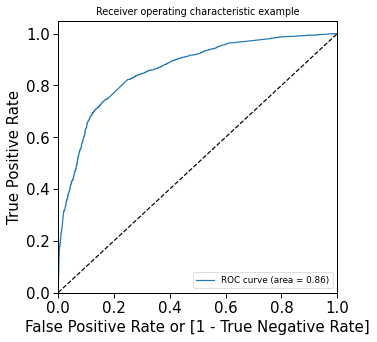

In [291]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

we got a ROC curve area of 0.86 which indicates a good model

### Optimal Cutoff Point

we had chosen an arbitrary cut-off value of 0.5 above. We need to determine the best cut-off value where we get balanced Sensitivity and specificity

In [292]:
# working on different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.053568,2178,0,1,0,0,0,0,0,0,0,0,0
1,1,0.943456,2924,1,1,1,1,1,1,1,1,1,1,1
2,0,0.899060,9108,1,1,1,1,1,1,1,1,1,1,0
3,0,0.069604,7926,0,1,0,0,0,0,0,0,0,0,0
4,0,0.252445,7870,0,1,1,1,0,0,0,0,0,0,0


In [293]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.392309     1.000000     0.000000
0.1          0.1  0.523337     0.983399     0.226333
0.2          0.2  0.688789     0.910277     0.545803
0.3          0.3  0.771127     0.829249     0.733606
0.4          0.4  0.802450     0.713834     0.859658
0.5          0.5  0.802760     0.663636     0.892575
0.6          0.6  0.783842     0.584980     0.912223
0.7          0.7  0.760118     0.488142     0.935698
0.8          0.8  0.734222     0.376680     0.965042
0.9          0.9  0.683517     0.206719     0.991324


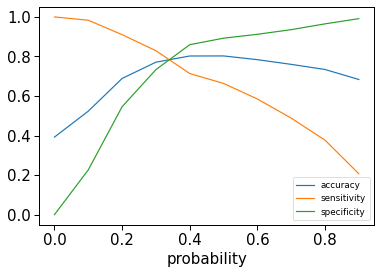

In [294]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the curve above, 0.3 is the optimum point,we can take it as a cutoff probability.

In [295]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.053568,2178,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.943456,2924,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.899060,9108,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.069604,7926,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.252445,7870,0,1,1,1,0,0,0,0,0,0,0,0


In [296]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_predicted,Lead_Score
0,0,0.053568,2178,0,5
1,1,0.943456,2924,1,94
2,0,0.899060,9108,1,90
3,0,0.069604,7926,0,7
4,0,0.252445,7870,0,25


In [297]:
# we know The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
# checking if 80% cases are correctly predicted based on the converted column.
checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    2098
0     432
Name: final_predicted, dtype: int64

In [298]:
# check the precentage of final_predicted conversions
conversion_rate=checking_df['final_predicted'].sum()/len(checking_df['final_predicted'])
conversion_rate

0.8292490118577075

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

###  Metrics based on new Cutoff

In [299]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7711273065591565

In [300]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2875, 1044],
       [ 432, 2098]], dtype=int64)

In [301]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [302]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8292490118577075

In [303]:
# Let us calculate specificity
TN / float(TN+FP)

0.7336055116101046

In [304]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2663944883898954


In [305]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6677275620623806


In [306]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8693680072573329


- Based on what we've seen so far, the model appears to be working well with an ROC curve of area 0.86
- We have following Metrics for Train dataset

     - Accuracy:**77%**
 
     -Sensitivity:**83%**

     -Specificity:**73%**

### Precision and Recall

In [307]:
from sklearn.metrics import precision_score, recall_score

In [308]:
# precision
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.6677275620623806

In [309]:
# Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8292490118577075

#### Precision-Recall tradeoff

In [310]:
#import precision-recall curve
from sklearn.metrics import precision_recall_curve

In [311]:
# creating and plotting curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

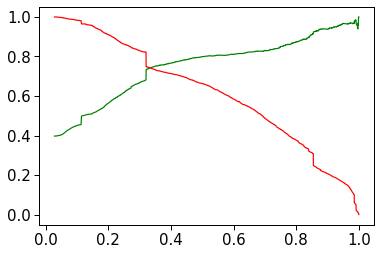

In [312]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [313]:
# scaling of numerical variables of test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [314]:
X_test = X_test[cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Welingak Website,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
2729,0,1.425180,0,1,0,0,0,1,0,0
5463,0,1.709519,0,0,0,0,0,0,1,0
6476,0,-0.760791,0,0,0,0,0,0,1,0
4135,0,-0.407631,0,0,0,0,0,0,0,1
5408,0,-0.885755,0,0,1,0,0,0,1,0


In [315]:
# Adding Constant
X_test_sm = sm.add_constant(X_test)

#### Making predictions on testset

In [316]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2729    0.684869
5463    0.753828
6476    0.165436
4135    0.764383
5408    0.320562
2681    0.984824
2271    0.830563
2659    0.984824
3186    0.501037
8213    0.967244
dtype: float64

In [317]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2729,0.684869
5463,0.753828
6476,0.165436
4135,0.764383
5408,0.320562


In [318]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df

,Converted
2729,1
5463,0
6476,0
4135,1
5408,1
...,...
1051,1
8706,0
7173,0
6151,1


In [319]:
# Putting 'Prospect ID' to index
y_test_df['Prospect ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [320]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,2729,0.684869
1,0,5463,0.753828
2,0,6476,0.165436
3,1,4135,0.764383
4,1,5408,0.320562


In [321]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [322]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,2729,1,0.684869
1,5463,0,0.753828
2,6476,0,0.165436
3,4135,1,0.764383
4,5408,1,0.320562


In [323]:
y_pred_final['Lead_score']=y_pred_final.Converted_prob.apply(lambda x:round(x*100))

In [324]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_score
0,2729,1,0.684869,68
1,5463,0,0.753828,75
2,6476,0,0.165436,17
3,4135,1,0.764383,76
4,5408,1,0.320562,32


In [325]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [326]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_score,final_predicted
0,2729,1,0.684869,68,1
1,5463,0,0.753828,75,1
2,6476,0,0.165436,17,0
3,4135,1,0.764383,76,1
4,5408,1,0.320562,32,1


In [327]:
#check if target lead conversion rate is 80% or above
checking_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    869
0    155
Name: final_predicted, dtype: int64

In [328]:
#find conversion rate
checking_df['final_predicted'].sum()/len(checking_df['final_predicted'])

0.8486328125

Lead conversion rate is above 80% and is similar to train set.So our model works fine on test and train dataset

### Overall Metrics

In [329]:
#Confusion matrix
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1273,  468],
       [ 155,  869]], dtype=int64)

In [330]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7746835443037975

In [331]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [332]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8486328125

In [333]:
# Let us calculate specificity
TN / float(TN+FP)

0.7311889718552556

In [334]:
#precision score
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.649962602842184

In [335]:
#Recall_score
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8486328125

- We have following Metrics for Test dataset

     - Accuracy:**77.4%**
 
     -Sensitivity:**84.8%**

     -Specificity:**73.11%**

**Conclusion:**

 - The test set's values for accuracy, sensitivity, and specificity are around 77%, 84%, and 73.11%  which are closer to the corresponding figures derived using the training set.
 - We should be able to give the CEO confidence in making wise decisions based on the model since it appears to predict the Conversion Rate quite accurately.
 - Important features that contribute most to the likelihood of a lead being converted or those that have a high conversion rate are:
     - What is your current occupation_Working Professional
     - Lead Origin_Lead Add Form
     - Lead Source_Welingak Website

     
     
    